In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Pyspark Installation
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=57843a810000df9724c397802d4ee928d160d2fabdbe66a16d946e05054ce53f
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [4]:
# Import SparkSession
from pyspark.sql import SparkSession

In [5]:
# Create a Session
spark = SparkSession.builder.appName('Fordgobike').getOrCreate()

In [6]:
spark

In [7]:
from pyspark.sql.functions import col,array_contains, expr, round

from pyspark.sql.types import ArrayType,\
 DoubleType,\
 BooleanType,\
 StructType,\
 StructField,\
 StringType,\
 IntegerType,\
 FloatType 

In [8]:
# Read Data
data = spark.read.option('header', 'true').csv('/content/drive/MyDrive/Dataset-2017-fordgobike-tripdata.csv')

In [9]:
# Display data
data.show(2)

+----------+--------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+
|start_time|end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id|user_type|member_birth_year|member_gender|     pyment|
+----------+--------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+
|   57:39.7| 12:50.2|              74|Laguna St at Haye...|           37.77643482|            -122.426244|            43|San Francisco Pub...|          37.7787677|         -122.4159292|     96| Customer|             1987|         Male|credit card|
|   56:3

In [10]:
# Display data schema
data.printSchema()

root
 |-- start_time: string (nullable = true)
 |-- end_time: string (nullable = true)
 |-- start_station_id: string (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: string (nullable = true)
 |-- start_station_longitude: string (nullable = true)
 |-- end_station_id: string (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: string (nullable = true)
 |-- end_station_longitude: string (nullable = true)
 |-- bike_id: string (nullable = true)
 |-- user_type: string (nullable = true)
 |-- member_birth_year: string (nullable = true)
 |-- member_gender: string (nullable = true)
 |-- pyment: string (nullable = true)



# ***Finding the number of null cells in each column***

In [11]:
# count the number of null cells for each column
for column in data.columns:
  null_count = data.filter(col(column).isNull()).count()

# print the number of null cells and express as a percentage
  print(f'the {column} contains {null_count} null entries representing {((null_count)/data.count())*100}% of the data')

the start_time contains 0 null entries representing 0.0% of the data
the end_time contains 0 null entries representing 0.0% of the data
the start_station_id contains 0 null entries representing 0.0% of the data
the start_station_name contains 0 null entries representing 0.0% of the data
the start_station_latitude contains 0 null entries representing 0.0% of the data
the start_station_longitude contains 0 null entries representing 0.0% of the data
the end_station_id contains 0 null entries representing 0.0% of the data
the end_station_name contains 0 null entries representing 0.0% of the data
the end_station_latitude contains 0 null entries representing 0.0% of the data
the end_station_longitude contains 0 null entries representing 0.0% of the data
the bike_id contains 0 null entries representing 0.0% of the data
the user_type contains 0 null entries representing 0.0% of the data
the member_birth_year contains 66541 null entries representing 12.8037329228401% of the data
the member_gend

***The columns 'member_birth_year' and 'member_gender' contain a lot of null cells, and will be treated accordingly when working on the. For now, let's start with some preliminary analysis***

# **Total Number Of Trips**

In [12]:
# Count total number of rows
data.count()

519700

In [13]:
# Count unique rows to determine presence of duplicates 
data.distinct().count()

519700

## *Total Number of Trips =* **519700**





# **Number of Stations**

In [14]:
# Count the total number of unique stations
total_stations = data.select('start_station_id').distinct().count()
total_stations

272

## *Total Number of Stations =* **272**






# **Number of Bikes**

In [15]:
# Count the total number of unique bike ids
data.select('bike_id').distinct().count()

3673

## *Total Number of Bikes* = **3673**

In [16]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **User Type Analysis**

In [17]:
# Group by 'user_type' column and count
user_type = data.groupBy('user_type').count()

# Determine user type percentages 
user_type = user_type.withColumn('Percentage', round(expr('count / sum(count) over() * 100'),2))
user_type.show()

+----------+------+----------+
| user_type| count|Percentage|
+----------+------+----------+
|Subscriber|409230|     78.74|
|  Customer|110470|     21.26|
+----------+------+----------+



## *User Type* 
* **Subscriber = 78.24%**
* **Customer = 21.26%**  







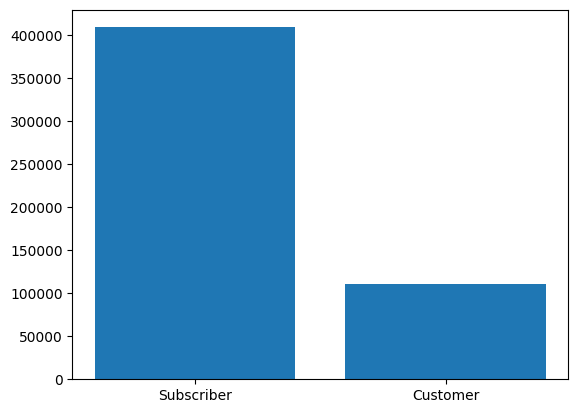

In [18]:
# convert to pandas dataframe
usertype = user_type.toPandas()

# create bar plot for user type analysis
fig, ax = plt.subplots()
ax.bar(usertype['user_type'], usertype['count'])
plt.show()

# **User Gender Analysis**

In [19]:
# group by user gender and count
user_gender = data.groupBy('member_gender').count()

# determine percentages for the genders
user_gender = user_gender.withColumn('Percentage', round(expr('count / sum(count) over() * 100'),2))
user_gender.show()

+-------------+------+----------+
|member_gender| count|Percentage|
+-------------+------+----------+
|         null| 66462|     12.79|
|       Female| 98621|     18.98|
|        Other|  6299|      1.21|
|         Male|348318|     67.02|
+-------------+------+----------+



## *Gender Proportions*
* **Male = 67.02%**
* **Female = 18.98%**
* **Other = 1.21%**
* **Unspecified = 12.79%**






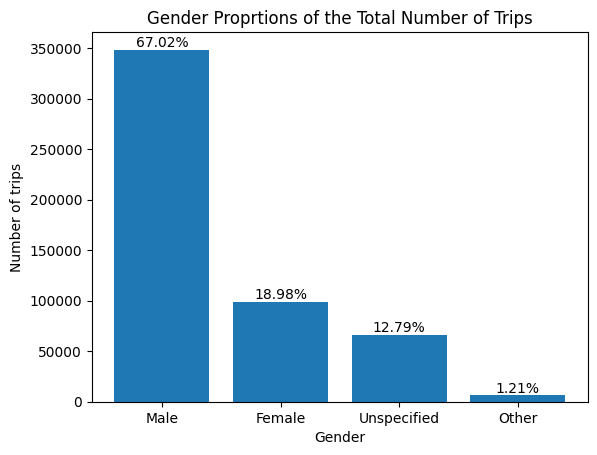

In [20]:
# convert to pandas dataframe
usergender = user_gender.toPandas()

# replace null gender cell with 'unspecified'
usergender = usergender.fillna('Unspecified').sort_values('count', ascending = False)

# plot user gender bar plot
fig, ax = plt.subplots()
rects = ax.bar(usergender['member_gender'], usergender['count'])
# display percentages on bars 
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{usergender['Percentage'].iloc[i]}%", ha='center', va='bottom')

# set axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of trips')
ax.set_title('Gender Proprtions of the Total Number of Trips')

# show grapgh
plt.show()

# **Analysis of Payment Methods**

In [21]:
# group data by payment method
payment_methods = data.groupBy('pyment').count()

# determine percentages for each payment method
payment_methods = payment_methods.withColumn('Percentage', round(expr('count / sum(count) over() * 100'),2))

payment_methods.show()

+-----------+------+----------+
|     pyment| count|Percentage|
+-----------+------+----------+
| app wallet|260061|     50.04|
|credit card|259639|     49.96|
+-----------+------+----------+



## *Payment Methods* 
* **App Wallet = 50.04%**
* **Credit Card = 49.96%**



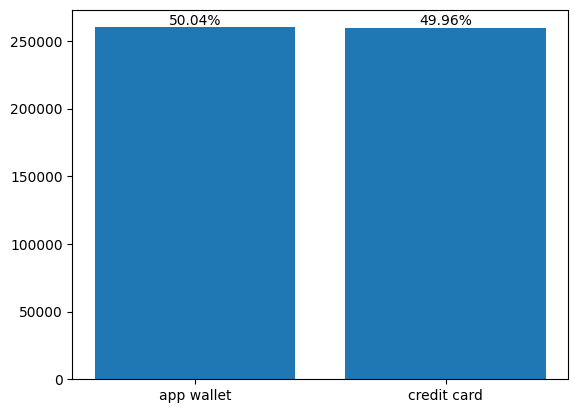

In [22]:
# convert payment method data to pandas dataframe
payment =payment_methods.toPandas()

# plot bar chart for payment methods
fig, ax = plt.subplots()

# display percentages on bars
rects = ax.bar(payment['pyment'], payment['count'])
for i, rect in enumerate(rects):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f"{payment['Percentage'].iloc[i]}%", ha='center', va='bottom')

# show chart
plt.show()

# **Data Wrangling**

## ***Guide***

*   convert start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude from string to double type and use them to calculate the distance of each trip using haversine library

*   convert member birth year to integer and use to create user age column

*   add date and hour components to start time and end time columns and use them to create trip time column

## **Creating a new column containing the ages of the users**

In [23]:
# cast member birth year to integer
data = data.withColumn('member_birth_year',col('member_birth_year').cast(IntegerType()))

In [24]:
from pyspark.sql.functions import current_date, year

# create customer age column
data = data.withColumn('Customer_Age', year(current_date()) - data['member_birth_year'])

In [25]:
data.select('Customer_Age').show(3)

+------------+
|Customer_Age|
+------------+
|          36|
|          58|
|        null|
+------------+
only showing top 3 rows



## **Using 'start_time' and 'end_time' columns to create a new column for Usage duration in minutes**

In [26]:
from pyspark.sql.functions import udf

# using udf to create a function that concatenates the hour '01' to the time elements since they lack the hour elements
def attachinghour(mystring):
    onehour = '01:'
    good_format = onehour+mystring
    return good_format
attachinghourUDF = udf(lambda x : attachinghour(x))

In [27]:
# attach hour element to start time and end time
data = data.withColumn('start_time', attachinghourUDF(data['start_time']))\
.withColumn('end_time', attachinghourUDF(data['end_time']))

In [28]:
data.select('start_time', 'end_time').show(3)

+----------+----------+
|start_time|  end_time|
+----------+----------+
|01:57:39.7|01:12:50.2|
|01:56:34.8|01:49:55.6|
|01:45:48.4|01:28:36.9|
+----------+----------+
only showing top 3 rows



In [29]:
# checking if there are rows where the start time occurs after the end time
data.filter(data['start_time'] > data['end_time']).show(3)

+----------+----------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+
|start_time|  end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id|user_type|member_birth_year|member_gender|     pyment|Customer_Age|
+----------+----------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+
|01:57:39.7|01:12:50.2|              74|Laguna St at Haye...|           37.77643482|            -122.426244|            43|San Francisco Pub...|          37.7787677|         -122.4159292|     96| Customer|      

In [30]:
# Using udf to define a function to change the hour element of the end time from '01' to '02' if the start time is later than the end time
def moving_up_thehour(starttime,endtime):
    if starttime > endtime:
        return endtime.replace(endtime[0:2],'02')
    else:
        return endtime

moving_hour_UDF = udf(moving_up_thehour , StringType())

# Applying udf to table
data = data.withColumn("end_time", moving_hour_UDF(data['start_time'],data['end_time']))

In [31]:
# Verify that all start times occur before end times
data.filter(data['start_time'] > data['end_time']).count()

0

In [32]:
from pyspark.sql.functions import to_timestamp

# change start and end time columns from string to timestamp
data = data.withColumn('start_time', to_timestamp(col('start_time'),"HH:mm:ss.SSS"))\
    .withColumn('end_time', to_timestamp(col('end_time'),"HH:mm:ss.SSS"))

In [33]:
# Import unix_timestamp
from pyspark.sql.functions import unix_timestamp

# Create new columns that contain the start and end times in seconds
data = data.withColumn('start_time_secs', unix_timestamp('start_time', 'HH:mm:ss:SSS'))\
.withColumn('end_time_secs', unix_timestamp('end_time', 'HH:mm:ss:SSS'))

# Create new column for time difference between start and end time in seconds
data = data.withColumn('diff_seconds', data['end_time_secs'] - data['start_time_secs'])

# Create new column for time difference between start and end time in minutes
data = data.withColumn('usage_duration', data['diff_seconds'] / 60)


In [34]:
data.show(3)

+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+---------------+-------------+------------+------------------+
|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id|user_type|member_birth_year|member_gender|     pyment|Customer_Age|start_time_secs|end_time_secs|diff_seconds|    usage_duration|
+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+---------------+------------

In [35]:
# Drop unnecessary columns
data = data.drop('start_time_secs', 'end_time_secs','diff_seconds')

In [36]:
# Convert 'usage_duration' to floattype
data = data.withColumn('usage_duration', col('usage_duration').cast(FloatType()))

# Round to two decimal places
data = data.withColumn('usage_duration', round(col('usage_duration'), 2))

In [37]:
data.show(3)

+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+--------------+
|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id|user_type|member_birth_year|member_gender|     pyment|Customer_Age|usage_duration|
+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+--------------+
|1970-01-01 01:57:...|1970-01-01 02:12:...|              74|Laguna St at Haye...|           37.77643482|  

## **Create Column for Trip Revenue where each Minute is 0.35 cents**

In [38]:
# Create column 'trip_revenue'
data = data.withColumn('trip_revenue', round(data['usage_duration'] * 0.35,2))

# cast trip_revenue column to float
data = data.withColumn('trip_revenue', col('trip_revenue').cast(FloatType()))

# round column to 2 decimal places
data = data.withColumn('trip_revenue', round(col('trip_revenue'), 2))
data.show(3)

+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+--------------+------------+
|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id|user_type|member_birth_year|member_gender|     pyment|Customer_Age|usage_duration|trip_revenue|
+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+--------------+------------+
|1970-01-01 01:57:...|1970-01-01 02:12:...|              74|Laguna 

## **Using Haversine Library to get the Distance between the Start and End Stations**

In [39]:
# Install haversine library
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
# Import haversine library
import haversine
from haversine import haversine, Unit

In [41]:
# Cast columns containing coordinates for the start and end stations to double
data = data.withColumn('start_station_latitude',data['start_station_latitude'].cast("double")).\
         withColumn('start_station_longitude',data['start_station_longitude'].cast("double")).\
        withColumn('end_station_latitude',data['end_station_latitude'].cast("double")).\
        withColumn('end_station_longitude',data['end_station_longitude'].cast("double"))

In [42]:
# Use udf to define the function for calculating the distance between the stations
@udf(returnType=DoubleType())
def calculate_distance(lat1, lon1, lat2, lon2):
    start = (lat1, lon1)
    end = (lat2, lon2)
    return haversine(start, end, unit=Unit.KILOMETERS)

# Create column for the distance and apply udf
data = data.withColumn("distance_km", calculate_distance(col("start_station_latitude"),
                                                     col("start_station_longitude"),
                                                     col("end_station_latitude"),
                                                     col("end_station_longitude")))\
                                                     .withColumn('distance_km', col('trip_revenue').cast(FloatType()))\
                                                     .withColumn('distance_km', round(col('distance_km'), 2))

In [43]:
data.show(3)

+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+--------------+------------+-----------+
|          start_time|            end_time|start_station_id|  start_station_name|start_station_latitude|start_station_longitude|end_station_id|    end_station_name|end_station_latitude|end_station_longitude|bike_id|user_type|member_birth_year|member_gender|     pyment|Customer_Age|usage_duration|trip_revenue|distance_km|
+--------------------+--------------------+----------------+--------------------+----------------------+-----------------------+--------------+--------------------+--------------------+---------------------+-------+---------+-----------------+-------------+-----------+------------+--------------+------------+-----------+
|1970-01-01 01:57:...|1970-01-0

# **Create new dataframe with only relevant columns for further analysis**

In [44]:
df = data.select('bike_id',
                 'start_station_id',
                 'start_station_name',
                 'end_station_id',
                 'end_station_name',
                 'user_type',
                 'member_gender',
                 'Customer_Age',
                 'pyment',
                 'usage_duration',
                 'distance_km',
                 'trip_revenue'
                 )


In [45]:
df.show(3)

+-------+----------------+--------------------+--------------+--------------------+---------+-------------+------------+-----------+--------------+-----------+------------+
|bike_id|start_station_id|  start_station_name|end_station_id|    end_station_name|user_type|member_gender|Customer_Age|     pyment|usage_duration|distance_km|trip_revenue|
+-------+----------------+--------------------+--------------+--------------------+---------+-------------+------------+-----------+--------------+-----------+------------+
|     96|              74|Laguna St at Haye...|            43|San Francisco Pub...| Customer|         Male|          36|credit card|         15.18|       5.31|        5.31|
|     88|             284|Yerba Buena Cente...|            96|Dolores St at 15t...| Customer|       Female|          58|credit card|         53.35|      18.67|       18.67|
|   1094|             245|Downtown Berkeley...|           245|Downtown Berkeley...| Customer|         null|        null|credit card|   

# **Revenue Characteristics**

In [46]:
from pyspark.sql import functions as F

# use agg function to calculate revenue characteristics
total_revenue = df.agg(
    F.sum('trip_revenue').alias('total_revenue'),
    F.min('trip_revenue').alias('min_revenue'),
    F.mean('trip_revenue').alias('mean_trip_revenue'),
    F.max('trip_revenue').alias('max_trip_revenue'),
    F.mean('usage_duration').alias('average_usage_time'),
    F.mean('distance_km').alias('average_distance')
)
total_revenue.show()

+------------------+-----------+-----------------+----------------+------------------+-----------------+
|     total_revenue|min_revenue|mean_trip_revenue|max_trip_revenue|average_usage_time| average_distance|
+------------------+-----------+-----------------+----------------+------------------+-----------------+
|2241193.7604584116|        0.0|4.312475967786053|           21.27|12.321322840254755|4.312475967786053|
+------------------+-----------+-----------------+----------------+------------------+-----------------+



### *Revenue Characteristics* 

*   *Total Revenue* = **$ 2,241,193.76**

*   *Minimum Trip Cost* = **$ 0.00**

*   *Average Trip Cost* = **$ 4.31**

*  *Maximum Trip Cost* = **$ 21.27**


## **Revenue when start and end stations are the same**

In [47]:
# use agg function to calculate same start and end stations revenue characteristics
same_start_end = df.filter(df['start_station_name'] == df['end_station_name']).agg(
    F.sum('trip_revenue').alias('revenue'),
    F.count('trip_revenue').alias('number_of_trips'),
    F.min('trip_revenue').alias('min_trip_revenue'),
    F.mean('trip_revenue').alias('average_trip_revenue'),
    F.max('trip_revenue').alias('max_trip_revenue'),
    F.mean('usage_duration').alias('average_usage_time'),
    F.mean('distance_km').alias('average_distance')
)

# define total number of trips
total_trips = data.distinct().count()

# define total revenue
rev = df.select('trip_revenue').agg({'trip_revenue':'sum'}).collect()[0][0]

# calculate revenue percentages
same_start_end = same_start_end.withColumn('count_percentage', (col('number_of_trips')/total_trips) * 100)\
.withColumn('revenue_percentage',(col('revenue')/rev) * 100)

same_start_end.show()

+----------------+---------------+----------------+--------------------+----------------+------------------+-----------------+------------------+------------------+
|         revenue|number_of_trips|min_trip_revenue|average_trip_revenue|max_trip_revenue|average_usage_time| average_distance|  count_percentage|revenue_percentage|
+----------------+---------------+----------------+--------------------+----------------+------------------+-----------------+------------------+------------------+
|143090.989970373|          18134|             0.0|   7.890757139647788|           21.19| 22.54498786594759|7.890757139647788|3.4893207619780644| 6.384588092959231|
+----------------+---------------+----------------+--------------------+----------------+------------------+-----------------+------------------+------------------+



### *Revenue Characteristics when start and end stations are the same* 

*   *Total Revenue* = **$ 143,091** representing **6.38%** of the total revenue

*   *Number of Trips* = **18134** representing **3.49%** of the total number of trips

*   *Minimum Trip Cost* = **$ 0.00**

*   *Average Trip Cost* = **$ 7.89**

*  *Maximum Trip Cost* = **$ 21.19**

*   *Average Trip Distance* =  **7.89 km**
*   *Average Trip Time* = **22.54 minutes**





# **Revenue when start and end stations are different**

In [48]:
# use agg function to calculate different start and end stations revenue characteristics
diff_start_end = df.filter(df['start_station_name'] != df['end_station_name']).agg(
    F.sum('trip_revenue').alias('revenue'),
    F.count('trip_revenue').alias('number_of_trips'),
    F.min('trip_revenue').alias('min_trip_revenue'),
    F.mean('trip_revenue').alias('average_trip_revenue'),
    F.max('trip_revenue').alias('max_trip_revenue'),
    F.mean('usage_duration').alias('average_usage_time'),
    F.mean('distance_km').alias('average_distance')
)

# calculate revenue percentages
diff_start_end = diff_start_end.withColumn('count_percentage', (col('number_of_trips')/total_trips) * 100)\
.withColumn('revenue_percentage',(col('revenue')/rev) * 100)

diff_start_end.show()

+------------------+---------------+----------------+--------------------+----------------+------------------+------------------+-----------------+------------------+
|           revenue|number_of_trips|min_trip_revenue|average_trip_revenue|max_trip_revenue|average_usage_time|  average_distance| count_percentage|revenue_percentage|
+------------------+---------------+----------------+--------------------+----------------+------------------+------------------+-----------------+------------------+
|2098102.7704880387|         501566|             0.0|  4.1831040590630915|           21.27|11.951688651382474|4.1831040590630915|96.51067923802194| 93.61541190704077|
+------------------+---------------+----------------+--------------------+----------------+------------------+------------------+-----------------+------------------+



### *Revenue Characteristics when start and end stations are different* 

*  *Total Revenue* = **$ 2,098,102** representing **93.62%** of the total revenue

*  *Number of Trips* = **501,566** representing **96.51%** of the total number of trips

*  *Minimum Trip Cost* = **$ 0.00**

*  *Average Trip Cost* = **$ 4.18**

*  *Maximum Trip Cost* = **$ 21.27**
*  *Average Trip Distance* =  **4.18 km**
*  *Average Trip Time* = **11.95 minutes**

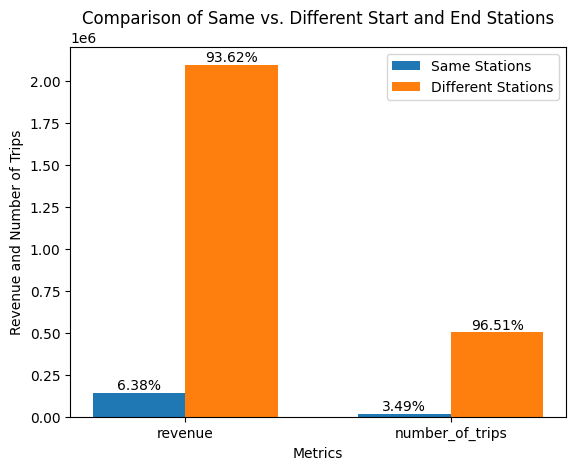

In [49]:
# convert chart data into panda dataframes
same_stations = same_start_end.toPandas()
diff_stations = diff_start_end.toPandas()

# select columns for chart
same_stations1 = same_stations[['revenue', 'number_of_trips']]
diff_stations1 = diff_stations[['revenue', 'number_of_trips']]

# define percentages to display on bars
same_count_percentage = same_stations['count_percentage'].values[0]
same_revenue_percentage = same_stations['revenue_percentage'].values[0]
diff_count_percentage = diff_stations['count_percentage'].values[0]
diff_revenue_percentage = diff_stations['revenue_percentage'].values[0]

fig, ax1 = plt.subplots()

bar_width = 0.35
r1 = np.arange(len(same_stations1.columns))
r2 = [x + bar_width for x in r1]

rects1 = ax1.bar(r1, same_stations1.iloc[0], width=bar_width, label='Same Stations')
rects2 = ax1.bar(r2, diff_stations1.iloc[0], width=bar_width, label='Different Stations')

# Set axis labels and title
ax1.set_xlabel('Metrics')
ax1.set_ylabel('Revenue and Number of Trips')
ax1.set_title('Comparison of Same vs. Different Start and End Stations')

ax1.set_xticks([r + bar_width / 2 for r in range(len(same_stations1.columns))])
ax1.set_xticklabels(same_stations1.columns)

# Add legend
ax1.legend(loc='upper right')

# Add count percentages to number of trips bars
height_offset = 0.00 * max(same_stations1.values[0])
ax1.text(r1[0] + bar_width / 2 - bar_width/2, same_stations1.values[0][0] + height_offset, f'{same_revenue_percentage:.2f}%', ha='center', va='bottom')
ax1.text(r1[1] + bar_width / 2 - bar_width/2, same_stations1.values[0][1] + height_offset, f'{same_count_percentage:.2f}%', ha='center', va='bottom')

# Add revenue percentages to revenue bars
height_offset = 0.00 * max(diff_stations1.values[0])
ax1.text(r2[0] + bar_width / 2 - bar_width/2, diff_stations1.values[0][0] + height_offset, f'{diff_revenue_percentage:.2f}%', ha='center', va='bottom')
ax1.text(r2[1] + bar_width / 2 - bar_width/2, diff_stations1.values[0][1] + height_offset, f'{diff_count_percentage:.2f}%', ha='center', va='bottom')

plt.show()


# **Popular Start and End Stations**

### ***Top 20 Start and End Stations***

In [50]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

In [51]:
# Group the DataFrame by start and end stations, calculate count and sum and order by count descendingly

# Start Stations
grouped_start_stations = df.groupBy('start_station_name').agg(
    {'start_station_name': 'count', 'trip_revenue': 'sum'}
).orderBy(col('count(start_station_name)').desc())

# End Stations
grouped_end_stations = df.groupBy('end_station_name').agg(
    {'end_station_name': 'count', 'trip_revenue': 'sum'}
).orderBy(col('count(end_station_name)').desc())



# Select the top 20 start and end stations 

# Start Stations
top20_start_stations = grouped_start_stations.limit(20)
top20_start_stations.show(3)

# End Stations
top20_end_stations = grouped_end_stations.limit(20)
top20_end_stations.show(3)

+--------------------+-------------------------+-----------------+
|  start_station_name|count(start_station_name)|sum(trip_revenue)|
+--------------------+-------------------------+-----------------+
|San Francisco Fer...|                    15187|78565.29005162418|
|The Embarcadero a...|                    13664|75668.27002232894|
|San Francisco Cal...|                    12546|51417.54003011808|
+--------------------+-------------------------+-----------------+
only showing top 3 rows

+--------------------+------------------+-----------------------+
|    end_station_name| sum(trip_revenue)|count(end_station_name)|
+--------------------+------------------+-----------------------+
|San Francisco Cal...|65101.420070141554|                  17378|
|San Francisco Fer...| 77615.86005461216|                  17109|
|The Embarcadero a...|106333.15004396625|                  16531|
+--------------------+------------------+-----------------------+
only showing top 3 rows



In [52]:
# Rearrange columns and rename columns as desired

# Top 20 Start Stations
top20_start_stations = top20_start_stations.select('start_station_name', 'count(start_station_name)', 'sum(trip_revenue)')\
.withColumnRenamed('sum(trip_revenue)', 'start_station_revenue').withColumnRenamed('count(start_station_name)', 'start_station_trip_num')
top20_start_stations.show(3)

# Top 20 End Stations
top20_end_stations = top20_end_stations.select('end_station_name', 'count(end_station_name)', 'sum(trip_revenue)')\
.withColumnRenamed('sum(trip_revenue)', 'end_station_revenue').withColumnRenamed('count(end_station_name)', 'end_station_trip_num')
top20_end_stations.show(3)

+--------------------+----------------------+---------------------+
|  start_station_name|start_station_trip_num|start_station_revenue|
+--------------------+----------------------+---------------------+
|San Francisco Fer...|                 15187|    78565.29005162418|
|The Embarcadero a...|                 13664|    75668.27002232894|
|San Francisco Cal...|                 12546|    51417.54003011808|
+--------------------+----------------------+---------------------+
only showing top 3 rows

+--------------------+--------------------+-------------------+
|    end_station_name|end_station_trip_num|end_station_revenue|
+--------------------+--------------------+-------------------+
|San Francisco Cal...|               17378| 65101.420070141554|
|San Francisco Fer...|               17109|  77615.86005461216|
|The Embarcadero a...|               16531| 106333.15004396625|
+--------------------+--------------------+-------------------+
only showing top 3 rows



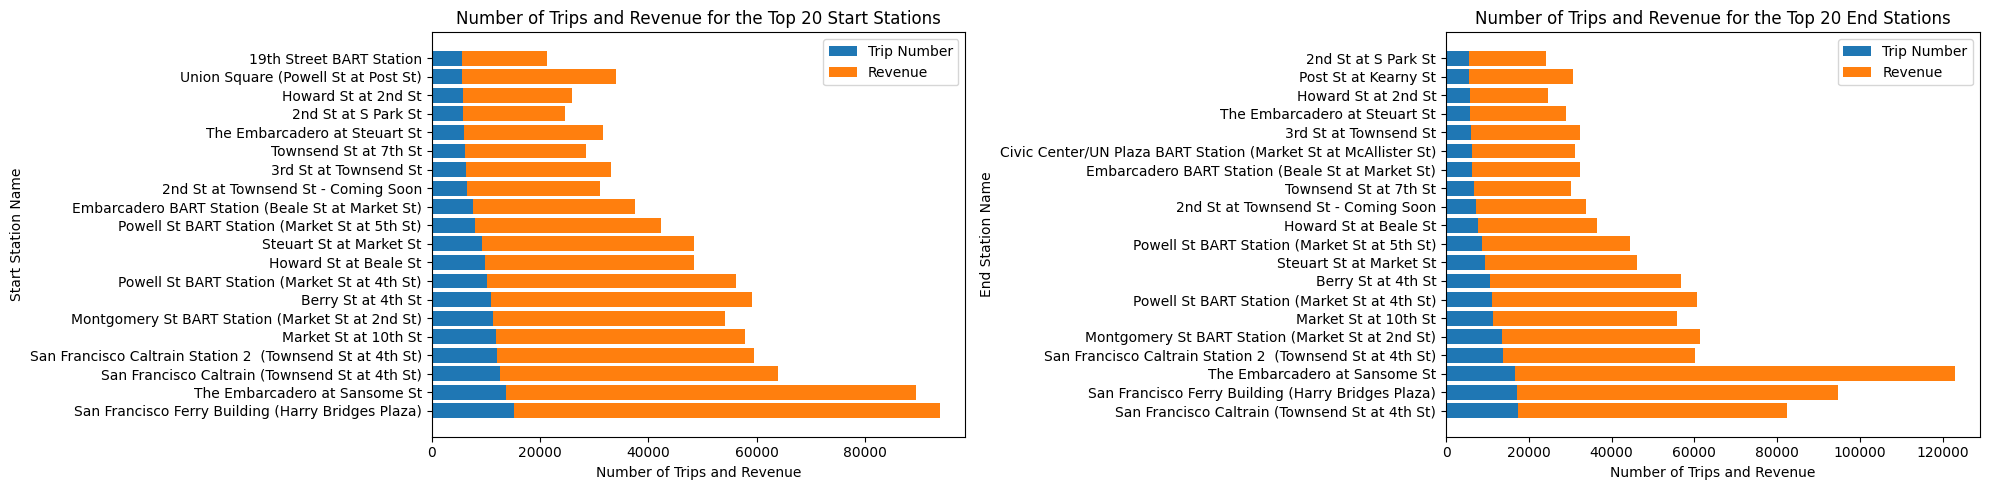

In [53]:
# convert chart data to panda dataframes
t20 = top20_start_stations.toPandas()
ot20 = top20_end_stations.toPandas()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

# Plot the start station subplot
axs[0].barh(t20['start_station_name'], t20['start_station_trip_num'], label='Trip Number')
axs[0].barh(t20['start_station_name'], t20['start_station_revenue'], label='Revenue', left=t20['start_station_trip_num'])
axs[0].set_xlabel('Number of Trips and Revenue')
axs[0].set_ylabel('Start Station Name')
axs[0].set_title('Number of Trips and Revenue for the Top 20 Start Stations')
axs[0].legend()

# Plot the end station subplot
axs[1].barh(ot20['end_station_name'], ot20['end_station_trip_num'], label='Trip Number')
axs[1].barh(ot20['end_station_name'], ot20['end_station_revenue'], label='Revenue', left=ot20['end_station_trip_num'])
axs[1].set_xlabel('Number of Trips and Revenue')
axs[1].set_ylabel('End Station Name')
axs[1].set_title('Number of Trips and Revenue for the Top 20 End Stations')
axs[1].legend()

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=360)

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

## **Comparing Top 20 Start and End Stations**

In [54]:
# Join Top 20 Start and End Stations
top_20 = top20_start_stations.join(top20_end_stations, 
                                    top20_start_stations.start_station_name == 
                                    top20_end_stations.end_station_name, how='outer')

# Aggregate the columns
top_20 = top_20.agg(
    F.sum('start_station_trip_num').alias('start_station_trip_num'),
    F.sum('start_station_revenue').alias('start_station_revenue'),
    F.sum('end_station_trip_num').alias('end_station_trip_num'),
    F.sum('end_station_revenue').alias('end_station_revenue')
)
top_20.show()

+----------------------+---------------------+--------------------+-------------------+
|start_station_trip_num|start_station_revenue|end_station_trip_num|end_station_revenue|
+----------------------+---------------------+--------------------+-------------------+
|                180659|    759480.8702313509|              192220|  797397.9303273577|
+----------------------+---------------------+--------------------+-------------------+



In [55]:
# calculate the percentages for trip number and revenue
top_20 = top_20.select(
    col('start_station_trip_num').alias('start_trips_top20'),
    ((col('start_station_trip_num') / df.count()) * 100).alias('start_trips_top20_%'),
    col('start_station_revenue').alias('start_revenue_top20'),
    ((col('start_station_revenue') / total_revenue.collect()[0][0]) * 100).alias('start_revenue_top20_%'),
    col('end_station_trip_num').alias('end_trips_top20'),
    ((col('end_station_trip_num') / df.count()) * 100).alias('end_trips_top20_%'),
    col('end_station_revenue').alias('end_revenue_top20'),
    ((col('end_station_revenue') / total_revenue.collect()[0][0]) * 100).alias('end_revenue_top20_%')
)


In [56]:
top_20.show()

+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+
|start_trips_top20|start_trips_top20_%|start_revenue_top20|start_revenue_top20_%|end_trips_top20|end_trips_top20_%|end_revenue_top20|end_revenue_top20_%|
+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+
|           180659| 34.762170482970944|  759480.8702313509|    33.88733645572917|         192220|36.98672310948624|797397.9303273577|  35.57916073103196|
+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+



In [57]:
# Change data types and round determined columns
top_20 = top_20.withColumn('start_trips_top20_%', F.round(F.col('start_trips_top20_%').cast('float'), 2))\
.withColumn('start_revenue_top20', F.round(F.col('start_revenue_top20').cast('float'), 2))\
.withColumn('start_revenue_top20_%', F.round(F.col('start_revenue_top20_%').cast('float'), 2))\
.withColumn('end_trips_top20_%', F.round(F.col('end_trips_top20_%').cast('float'), 2))\
.withColumn('end_revenue_top20', F.round(F.col('end_revenue_top20').cast('float'), 2))\
.withColumn('end_revenue_top20_%', F.round(F.col('end_revenue_top20_%').cast('float'), 2))


In [58]:
top_20.show()

+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+
|start_trips_top20|start_trips_top20_%|start_revenue_top20|start_revenue_top20_%|end_trips_top20|end_trips_top20_%|end_revenue_top20|end_revenue_top20_%|
+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+
|           180659|              34.76|           759480.9|                33.89|         192220|            36.99|        797397.94|              35.58|
+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+



### ***Identifying Overlap in Start and End Stations in Top 20***

In [59]:
# join respective datasets for the top 20 start and end stations
top20_stations = top20_start_stations.join(top20_end_stations, top20_start_stations.start_station_name == top20_end_stations.end_station_name, how='outer')

# convert columns to float and round the values
top20_stations = top20_stations.withColumn('start_station_revenue', F.round(F.col('start_station_revenue').cast('float'), 2))\
.withColumn('end_station_revenue', F.round(F.col('end_station_revenue').cast('float'), 2))\

top20_stations.show(25)


+--------------------+----------------------+---------------------+--------------------+--------------------+-------------------+
|  start_station_name|start_station_trip_num|start_station_revenue|    end_station_name|end_station_trip_num|end_station_revenue|
+--------------------+----------------------+---------------------+--------------------+--------------------+-------------------+
|19th Street BART ...|                  5558|             15763.01|                null|                null|               null|
| 2nd St at S Park St|                  5785|             18803.91| 2nd St at S Park St|                5581|           18449.13|
|2nd St at Townsen...|                  6605|             24499.27|2nd St at Townsen...|                7277|           26562.87|
|3rd St at Townsen...|                  6414|             26673.28|3rd St at Townsen...|                6132|           26244.34|
|  Berry St at 4th St|                 10956|             48106.02|  Berry St at 4th St|  

In [60]:
# select and define columns for venn diagram
top20_stations = top20_stations.select('start_station_name', 'end_station_name')

# convert data to pandas dataframe
top20_stations = top20_stations.toPandas()


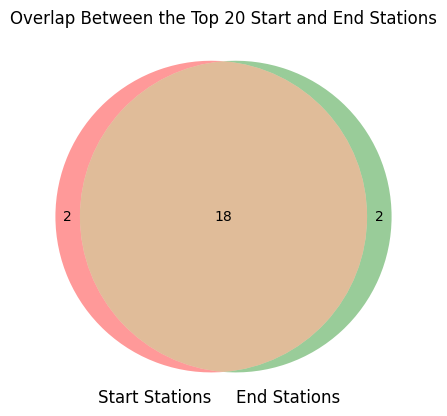

In [61]:
from matplotlib_venn import venn2

# Create sets from the start_station_name and end_station_name columns
start_stations = set(top20_stations['start_station_name'].dropna())
end_stations = set(top20_stations['end_station_name'].dropna())

# Compute the intersection and unique stations
intersection = start_stations.intersection(end_stations)
unique_start = start_stations.difference(end_stations)
unique_end = end_stations.difference(start_stations)

# Plot the Venn diagram
venn2(subsets=(len(unique_start), len(unique_end), len(intersection)),
      set_labels=('Start Stations', 'End Stations'))

# Display the plot
plt.title('Overlap Between the Top 20 Start and End Stations')
plt.show()


# **Outside Top 20 Start and End Stations**

### ***Start Stations***

In [62]:
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number

# Group the DataFrame and calculate count and sum
grouped_start_stations = df.groupBy('start_station_name').agg(
    {'start_station_name': 'count', 'trip_revenue': 'sum'}
)

# Order the DataFrame by count in descending order
ordered_df = grouped_start_stations.orderBy(col('count(start_station_name)').desc())

# Add row number column
window_spec = Window.orderBy(col('count(start_station_name)').desc())
ordered_df = ordered_df.withColumn('row_number', row_number().over(window_spec))

# Select the stations outside the top 20 rows
outside_top_20_start_stations = ordered_df.filter(col('row_number') > 20)

outside_top_20_start_stations = outside_top_20_start_stations.select('start_station_name', 'count(start_station_name)', 'sum(trip_revenue)')\
.withColumnRenamed('sum(trip_revenue)', 'start_station_revenue').withColumnRenamed('count(start_station_name)', 'start_station_trip_num')

outside_top_20_start_stations.show(1)

+--------------------+----------------------+---------------------+
|  start_station_name|start_station_trip_num|start_station_revenue|
+--------------------+----------------------+---------------------+
|Civic Center/UN P...|                  5497|   23604.949991988018|
+--------------------+----------------------+---------------------+
only showing top 1 row



### ***End Stations***

In [63]:
# Group the DataFrame and calculate count and sum
grouped_end_stations = df.groupBy('end_station_name').agg(
    {'end_station_name': 'count', 'trip_revenue': 'sum'}
)

# Order the DataFrame by count in descending order
ordered_df = grouped_end_stations.orderBy(col('count(end_station_name)').desc())

# Add row number column
window_spec = Window.orderBy(col('count(end_station_name)').desc())
ordered_df = ordered_df.withColumn('row_number', row_number().over(window_spec))

# Select the stations outside the top 20 rows
outside_top_20_end_stations = ordered_df.filter(col('row_number') > 20)

outside_top_20_end_stations = outside_top_20_end_stations.select('end_station_name', 'count(end_station_name)', 'sum(trip_revenue)')\
.withColumnRenamed('sum(trip_revenue)', 'end_station_revenue').withColumnRenamed('count(end_station_name)', 'end_station_trip_num')

outside_top_20_end_stations.show(1)

+--------------------+--------------------+-------------------+
|    end_station_name|end_station_trip_num|end_station_revenue|
+--------------------+--------------------+-------------------+
|19th Street BART ...|                5505| 14672.729998588562|
+--------------------+--------------------+-------------------+
only showing top 1 row



In [64]:
# join both datasets
outside_top_20 = outside_top_20_start_stations.join(outside_top_20_end_stations, 
                                                    outside_top_20_start_stations.start_station_name == 
                                                    outside_top_20_end_stations.end_station_name, how='outer')

# aggregate data to find trip number and revenue
outside_top_20 = outside_top_20.agg(
    F.sum('start_station_trip_num').alias('start_station_trip_num'),
    F.sum('start_station_revenue').alias('start_station_revenue'),
    F.sum('end_station_trip_num').alias('end_station_trip_num'),
    F.sum('end_station_revenue').alias('end_station_revenue')
)
outside_top_20.show()

+----------------------+---------------------+--------------------+-------------------+
|start_station_trip_num|start_station_revenue|end_station_trip_num|end_station_revenue|
+----------------------+---------------------+--------------------+-------------------+
|                339041|   1481712.8902270608|              327480|  1443795.830131054|
+----------------------+---------------------+--------------------+-------------------+



In [65]:
# calculate metric percentages
outside_top_20 = outside_top_20.select(
    col('start_station_trip_num').alias('start_trips_total_outside20'),
    ((col('start_station_trip_num') / df.count()) * 100).alias('start_trips_outside20_%'),
    col('start_station_revenue').alias('start_revenue_total_outside_20'),
    ((col('start_station_revenue') / total_revenue.collect()[0][0]) * 100).alias('start_trips_revenue_outside20_%'),
    col('end_station_trip_num').alias('end_trips_total_outside20'),
    ((col('end_station_trip_num') / df.count()) * 100).alias('end_trips_outside20_%'),
    col('end_station_revenue').alias('end_revenue_total_outside_20'),
    ((col('end_station_revenue') / total_revenue.collect()[0][0]) * 100).alias('end_trips_revenue_outside20_%')
)


In [66]:
outside_top_20.show()

+---------------------------+-----------------------+------------------------------+-------------------------------+-------------------------+---------------------+----------------------------+-----------------------------+
|start_trips_total_outside20|start_trips_outside20_%|start_revenue_total_outside_20|start_trips_revenue_outside20_%|end_trips_total_outside20|end_trips_outside20_%|end_revenue_total_outside_20|end_trips_revenue_outside20_%|
+---------------------------+-----------------------+------------------------------+-------------------------------+-------------------------+---------------------+----------------------------+-----------------------------+
|                     339041|      65.23782951702906|            1481712.8902270608|              66.11266354427082|                   327480|    63.01327689051376|           1443795.830131054|            64.42083926896804|
+---------------------------+-----------------------+------------------------------+--------------------

In [67]:
# convert selected columns to float and round
outside_top_20 = outside_top_20.withColumn('start_trips_revenue_outside20_%', F.round(F.col('start_trips_revenue_outside20_%').cast('float'), 2))\
.withColumn('start_trips_outside20_%', F.round(F.col('start_trips_outside20_%').cast('float'), 2))\
.withColumn('start_revenue_total_outside_20', F.round(F.col('start_revenue_total_outside_20').cast('float'), 2))\
.withColumn('end_trips_outside20_%', F.round(F.col('end_trips_outside20_%').cast('float'), 2))\
.withColumn('end_revenue_total_outside_20', F.round(F.col('end_revenue_total_outside_20').cast('float'), 2))\
.withColumn('end_trips_revenue_outside20_%', F.round(F.col('end_trips_revenue_outside20_%').cast('float'), 2))

In [68]:
# metrics datasets for top 20 and outside top 20 start and end stations
top_20.show()
outside_top_20.show()

+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+
|start_trips_top20|start_trips_top20_%|start_revenue_top20|start_revenue_top20_%|end_trips_top20|end_trips_top20_%|end_revenue_top20|end_revenue_top20_%|
+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+
|           180659|              34.76|           759480.9|                33.89|         192220|            36.99|        797397.94|              35.58|
+-----------------+-------------------+-------------------+---------------------+---------------+-----------------+-----------------+-------------------+

+---------------------------+-----------------------+------------------------------+-------------------------------+-------------------------+---------------------+----------------------------+-----------------------------+
|star

### ***Plotting charts to compare the metrics***

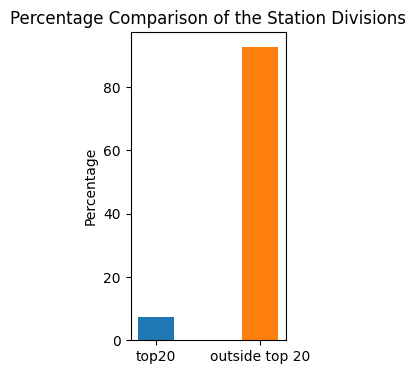

In [69]:
# define data for trip percentage comparison between top 20 and ouside top 20
top_20_stations_percentage = (top20_start_stations.count() / total_stations) * 100
outside_top_20_stations_percentage = (outside_top_20_start_stations.count() / total_stations) * 100

fig = plt.figure(figsize=(2, 4))

# plot the chart
plt.bar('top20', top_20_stations_percentage, width=0.35)
plt.bar('outside top 20', outside_top_20_stations_percentage, width=0.35)

# create y label and title
plt.ylabel('Percentage')
plt.title('Percentage Comparison of the Station Divisions')

plt.show()


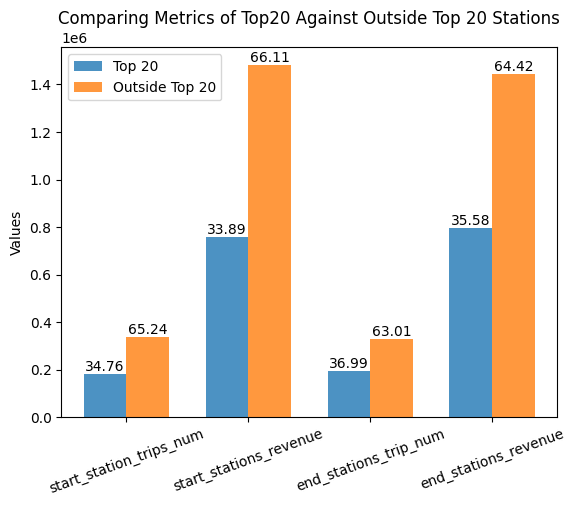

In [70]:
# Define the metrics and their corresponding values and percentages
metrics = ['start_station_trips_num', 'start_stations_revenue', 'end_stations_trip_num', 'end_stations_revenue']
top_20_stations = top_20.collect()[0][::2]
percentages_top_20 = top_20.collect()[0][1::2]
outside_top_20_stations = outside_top_20.collect()[0][::2]
percentages_outside_top_20 = outside_top_20.collect()[0][1::2]

# Format the values with 2 decimal places
top_20_stations = [float(format(val, '.2f')) for val in top_20_stations]
percentages_top_20 = [float(format(val, '.2f')) for val in percentages_top_20]
outside_top_20_stations = [float(format(val, '.2f')) for val in outside_top_20_stations]
percentages_outside_top_20 = [float(format(val, '.2f')) for val in percentages_outside_top_20]


# Calculate the number of metrics
num_metrics = len(metrics)

# Set the width of each bar
bar_width = 0.35

# Create an array of indices for the x-axis
indices = np.arange(num_metrics)

# Plot the values and percentages for both dataframes
fig, ax = plt.subplots()
bars_top_20 = ax.bar(indices, top_20_stations, bar_width, label='Top 20', alpha=0.8)
bars_outside_top_20 = ax.bar(indices + bar_width, outside_top_20_stations, bar_width, label='Outside Top 20', alpha=0.8)

# Add labels and percentages to the bars
for i, bar in enumerate(bars_top_20):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(percentages_top_20[i]), ha='center', va='bottom')
for i, bar in enumerate(bars_outside_top_20):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(percentages_outside_top_20[i]), ha='center', va='bottom')

# Set the x-axis labels
ax.set_xticks(indices + bar_width / 2)
ax.set_xticklabels(metrics, rotation=20)

# Set the y-axis label
ax.set_ylabel('Values')

# Set the chart title
ax.set_title('Comparing Metrics of Top20 Against Outside Top 20 Stations')

# Add a legend
ax.legend()

# Display the chart
plt.show()


# **Categorizing Data into Age Groups for Further Analysis**

In [71]:
# find max and min ages to give a better idea of the range

df.select('Customer_Age').agg(F.min('Customer_Age'), F.max('Customer_Age')).show()

+-----------------+-----------------+
|min(Customer_Age)|max(Customer_Age)|
+-----------------+-----------------+
|               24|              137|
+-----------------+-----------------+



In [72]:
# Drop all columns with null 'Customer_Age' column 
grouped_ages = df.na.drop(subset=['Customer_Age'])

# Verify there are no nulls in 'Customer_Age'
grouped_ages.filter(grouped_ages['Customer_Age'].isNull()).show()

+-------+----------------+------------------+--------------+----------------+---------+-------------+------------+------+--------------+-----------+------------+
|bike_id|start_station_id|start_station_name|end_station_id|end_station_name|user_type|member_gender|Customer_Age|pyment|usage_duration|distance_km|trip_revenue|
+-------+----------------+------------------+--------------+----------------+---------+-------------+------------+------+--------------+-----------+------------+
+-------+----------------+------------------+--------------+----------------+---------+-------------+------------+------+--------------+-----------+------------+



In [73]:
from pyspark.sql.functions import when

# Define age group boundaries
age_groups = [(21, 30), (31, 40), (41, 50),(51, 60), (60, float('inf'))]

# Create a new column with age groups
grouped_ages = grouped_ages.withColumn('age_group', 
                   when((grouped_ages.Customer_Age >= age_groups[0][0]) & (grouped_ages.Customer_Age <= age_groups[0][1]), '21-30')
                   .when((grouped_ages.Customer_Age >= age_groups[1][0]) & (grouped_ages.Customer_Age <= age_groups[1][1]), '31-40')
                   .when((grouped_ages.Customer_Age >= age_groups[2][0]) & (grouped_ages.Customer_Age <= age_groups[2][1]), '41-50')
                   .when((grouped_ages.Customer_Age >= age_groups[3][0]) & (grouped_ages.Customer_Age <= age_groups[3][1]), '51-60')
                   .when(grouped_ages.Customer_Age>= age_groups[4][0], '>60')
                   .otherwise('unspecified'))

# Show the results
grouped_ages.show(3)

+-------+----------------+--------------------+--------------+--------------------+----------+-------------+------------+-----------+--------------+-----------+------------+---------+
|bike_id|start_station_id|  start_station_name|end_station_id|    end_station_name| user_type|member_gender|Customer_Age|     pyment|usage_duration|distance_km|trip_revenue|age_group|
+-------+----------------+--------------------+--------------+--------------------+----------+-------------+------------+-----------+--------------+-----------+------------+---------+
|     96|              74|Laguna St at Haye...|            43|San Francisco Pub...|  Customer|         Male|          36|credit card|         15.18|       5.31|        5.31|    31-40|
|     88|             284|Yerba Buena Cente...|            96|Dolores St at 15t...|  Customer|       Female|          58|credit card|         53.35|      18.67|       18.67|    51-60|
|   3167|             239|Bancroft Way at T...|           247|Fulton St at Banc.

In [74]:
# verify there are no null cells in the age group column
grouped_ages.filter(grouped_ages['age_group'] == 'unspecified').show()

+-------+----------------+------------------+--------------+----------------+---------+-------------+------------+------+--------------+-----------+------------+---------+
|bike_id|start_station_id|start_station_name|end_station_id|end_station_name|user_type|member_gender|Customer_Age|pyment|usage_duration|distance_km|trip_revenue|age_group|
+-------+----------------+------------------+--------------+----------------+---------+-------------+------------+------+--------------+-----------+------------+---------+
+-------+----------------+------------------+--------------+----------------+---------+-------------+------------+------+--------------+-----------+------------+---------+



## ***User Type Analysis***

In [75]:
# group data by user type and aggregate data
user_type_analysis = grouped_ages.groupBy('user_type').agg(F.count('member_gender').alias('num_of_users'),
                                                          F.mean('usage_duration').alias('average_trip_duration'), 
                                                          F.mean('distance_km').alias('average_trip_distance'), 
                                                          F.mean('trip_revenue').alias('average_trip_revenue')
                                                          )
user_type_analysis.show()

+----------+------------+---------------------+---------------------+--------------------+
| user_type|num_of_users|average_trip_duration|average_trip_distance|average_trip_revenue|
+----------+------------+---------------------+---------------------+--------------------+
|Subscriber|      404424|   10.400093417477164|    3.640050343904231|   3.640050343904231|
|  Customer|       48735|   17.384485892840345|    6.084556686055407|   6.084556686055407|
+----------+------------+---------------------+---------------------+--------------------+



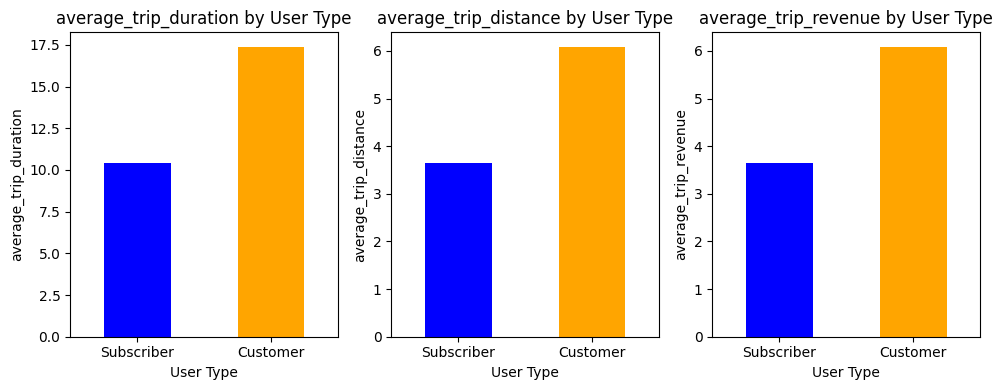

In [76]:
# Define the metrics to plot (excluding 'num_of_users')
metrics = ['average_trip_duration', 'average_trip_distance', 'average_trip_revenue']

# Define the color for each bar
bar_colors = ['blue', 'orange', 'purple']

# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Iterate over the metrics and plot
for i, metric in enumerate(metrics):
    # Extract the data for the metric
    data2 = user_type_analysis.select('user_type', metric).toPandas()

    # Determine the subplot position
    ax = axs[i]

    # Get the number of bars in the plot
    num_bars = len(data2)

    # Plot the bar chart with specific colors for each bar
    data2.plot(x='user_type', y=metric, kind='bar', ax=ax, color=[bar_colors[j % num_bars] for j in range(num_bars)], legend=False)

    # Set the labels and title for each subplot
    ax.set_xlabel('User Type')
    ax.set_ylabel(metric)
    ax.set_title(f'{metric} by User Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [77]:
# this is a dummy block


#import matplotlib.pyplot as plt

# Define the metrics to plot
#metrics = ['avg(trip_revenue)', 'count(pyment)', 'count(member_gender)', 'avg(usage_duration)', 'avg(distance_km)']

# Define the colors for each chart
#colors = ['red', 'green', 'blue', 'orange', 'purple']

# Create a grid of subplots
#fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Iterate over the metrics and plot
#for i, metric in enumerate(metrics):
#    if i < 5:
#       # Extract the data for the metric
#      data = user_type_analysis.select('user_type', metric).toPandas()
#
#        # Determine the subplot position
#        row = i // 3
#        col = i % 3
#        ax = axs[row, col]
#
        # Plot the bar chart
#        data.plot(x='user_type', y=metric, kind='bar', ax=ax, color=colors[i])

        # Set the labels and title for each subplot
#        ax.set_xlabel('User Type')
#        ax.set_ylabel(metric)
#        ax.set_title(f'{metric} by User Type')
#        ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

# Remove the empty subplot
#fig.delaxes(axs.flatten()[5])

# Adjust the spacing between subplots
#plt.tight_layout()

# Show the plot
#plt.show()


## ***Gender Analysis***

In [78]:
gender_analysis = grouped_ages.groupBy('member_gender').agg(F.count('member_gender').alias('num_of_users'),
                                                          F.mean('usage_duration').alias('average_trip_duration'), 
                                                          F.mean('distance_km').alias('average_trip_distance'), 
                                                          F.mean('trip_revenue').alias('average_trip_revenue')
                                                          )
gender_analysis.show()

+-------------+------------+---------------------+---------------------+--------------------+
|member_gender|num_of_users|average_trip_duration|average_trip_distance|average_trip_revenue|
+-------------+------------+---------------------+---------------------+--------------------+
|       Female|       98542|   12.769140367901068|    4.469217594009741|   4.469217594009741|
|        Other|        6299|   12.573041750085904|    4.400554055646405|   4.400554055646405|
|         Male|      348318|    10.66779804701411|     3.73374290226922|    3.73374290226922|
+-------------+------------+---------------------+---------------------+--------------------+



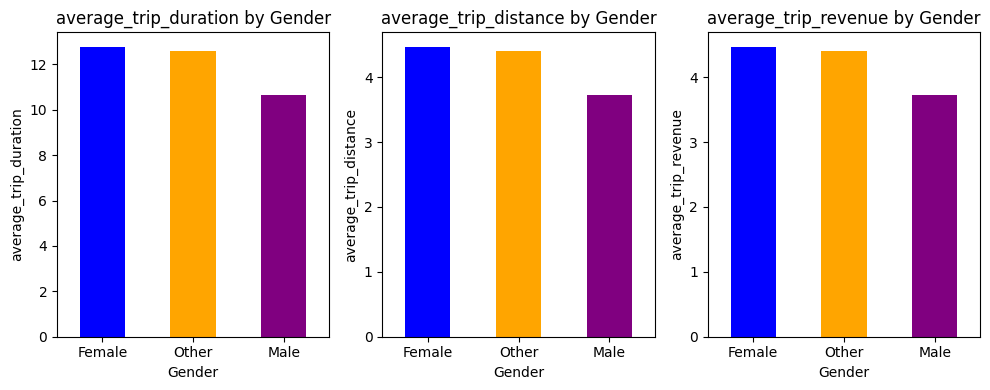

In [79]:
# Define the metrics to plot
metrics = ['average_trip_duration', 'average_trip_distance', 'average_trip_revenue']

# Define the colors for each chart
bar_colors = ['blue', 'orange', 'purple']

# Create a grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Iterate over the metrics and plot
for i, metric in enumerate(metrics):
        # Extract the data for the metric
        data1 = gender_analysis.select('member_gender', metric).toPandas()

        # Determine the subplot position
        ax = axs[i]

        # Get the number of bars in the plot
        num_bars = len(data1)

        # Plot the bar chart
        data1.plot(x='member_gender', y=metric, kind='bar', ax=ax, color=[bar_colors[j % num_bars] for j in range(num_bars)], legend=False)

        # Set the labels and title for each subplot
        ax.set_xlabel('Gender')
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} by Gender')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=360)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


## ***Age Group Analysis***

### ***User distribution for the age groups***

In [80]:
#group data by age group 
age_group = grouped_ages.groupBy('age_group').agg({'age_group':'count'}).orderBy('age_group')

# calculate percentages of each age group
age_group = age_group.withColumn('percentage', round(col('count(age_group)') * 100 /age_group.agg({'count(age_group)':'sum'}).collect()[0][0],2) )
age_group.show()

+---------+----------------+----------+
|age_group|count(age_group)|percentage|
+---------+----------------+----------+
|    21-30|           37319|      8.24|
|    31-40|          194881|      43.0|
|    41-50|          124940|     27.57|
|    51-60|           66979|     14.78|
|      >60|           29040|      6.41|
+---------+----------------+----------+



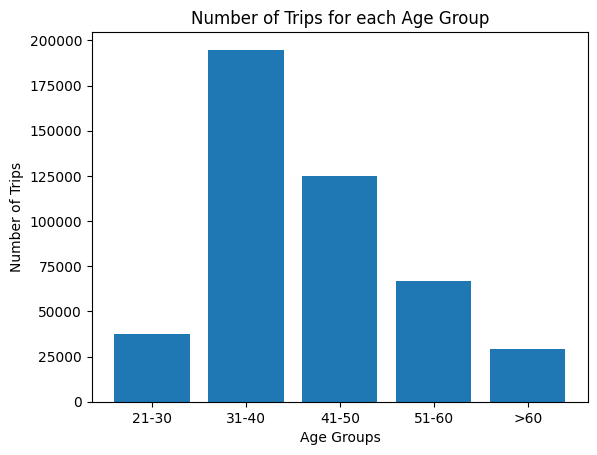

In [82]:
# define data for chart
age_groups = age_group.select('age_group').rdd.flatMap(lambda x: x).collect()
counts = age_group.select('count(age_group)').rdd.flatMap(lambda x: x).collect()

# plot chart
fig, ax = plt.subplots()
ax.bar(age_groups, counts)

# set axis labels and title
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Age Groups')
ax.set_title('Number of Trips for each Age Group')

plt.show()



### ***User type distribution for all age groups***

In [83]:
# group data by age group and user type
age_group_user_type = grouped_ages.groupBy('age_group', 'User_type').agg({'user_type':'count'}).orderBy('age_group','user_type')
age_group_user_type.show()

+---------+----------+----------------+
|age_group| User_type|count(user_type)|
+---------+----------+----------------+
|    21-30|  Customer|            7007|
|    21-30|Subscriber|           30312|
|    31-40|  Customer|           24376|
|    31-40|Subscriber|          170505|
|    41-50|  Customer|           10899|
|    41-50|Subscriber|          114041|
|    51-60|  Customer|            4754|
|    51-60|Subscriber|           62225|
|      >60|  Customer|            1699|
|      >60|Subscriber|           27341|
+---------+----------+----------------+



In [84]:
# create user type pivot chart for graph
pivot_user_type = grouped_ages.groupBy('age_group').pivot('user_type').agg({'user_type':'count'}).orderBy('age_group')
pivot_user_type.show()


+---------+--------+----------+
|age_group|Customer|Subscriber|
+---------+--------+----------+
|    21-30|    7007|     30312|
|    31-40|   24376|    170505|
|    41-50|   10899|    114041|
|    51-60|    4754|     62225|
|      >60|    1699|     27341|
+---------+--------+----------+



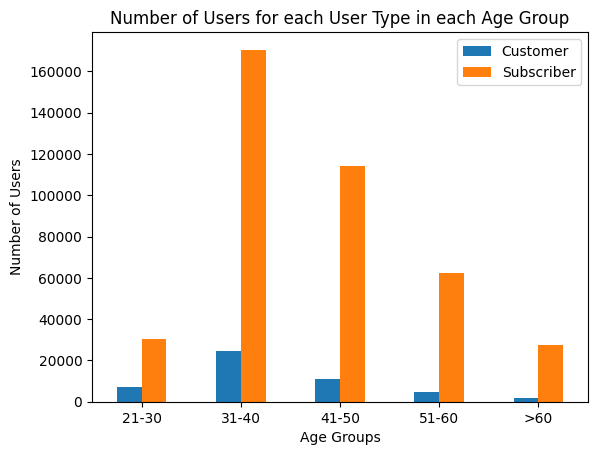

In [85]:
# define pivot chart data for bar chart
chart_data = pivot_user_type.select("age_group", "Customer", "Subscriber")

# convert chart data to pandas dataframe
chart_data_pandas = chart_data.toPandas()

# set x axis
chart_data_pandas.set_index("age_group", inplace=True)

# plot chart
chart_data_pandas.plot(kind="bar")

# set axis labels and title
plt.ylabel('Number of Users')
plt.xlabel('Age Groups')
plt.title('Number of Users for each User Type in each Age Group')
plt.xticks(rotation=360)

plt.show()

### ***Gender distribution for all age groups***

In [86]:
# group data by gender
age_group_gender = grouped_ages.groupBy('age_group', 'member_gender').agg({'member_gender':'count'}).orderBy('age_group','member_gender')
age_group_gender.show()

+---------+-------------+--------------------+
|age_group|member_gender|count(member_gender)|
+---------+-------------+--------------------+
|    21-30|       Female|                9092|
|    21-30|         Male|               27570|
|    21-30|        Other|                 657|
|    31-40|       Female|               48469|
|    31-40|         Male|              144090|
|    31-40|        Other|                2322|
|    41-50|       Female|               23681|
|    41-50|         Male|               99350|
|    41-50|        Other|                1909|
|    51-60|       Female|               12520|
|    51-60|         Male|               53382|
|    51-60|        Other|                1077|
|      >60|       Female|                4780|
|      >60|         Male|               23926|
|      >60|        Other|                 334|
+---------+-------------+--------------------+



In [87]:
# create gender pivot chart for plotting
pivot_gender = grouped_ages.groupBy('age_group').pivot('member_gender').agg({'member_gender':'count'}).orderBy('age_group')
pivot_gender.show()

+---------+------+------+-----+
|age_group|Female|  Male|Other|
+---------+------+------+-----+
|    21-30|  9092| 27570|  657|
|    31-40| 48469|144090| 2322|
|    41-50| 23681| 99350| 1909|
|    51-60| 12520| 53382| 1077|
|      >60|  4780| 23926|  334|
+---------+------+------+-----+



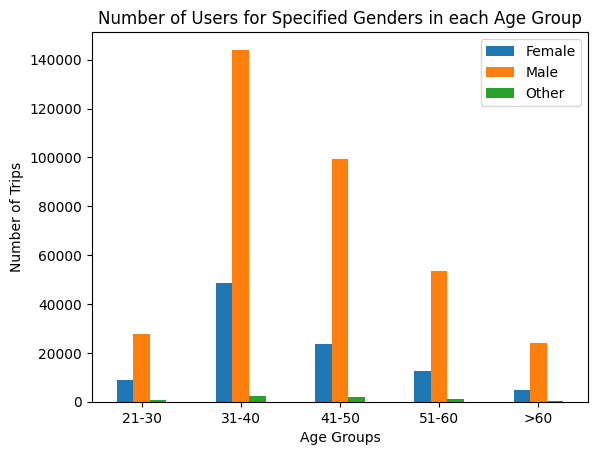

In [88]:
# define columns for plotting
gender_chart_data = pivot_gender.select("age_group", "Female", "Male", "Other")

# convert data to pandas dataframe
gender_chart_data_pandas = pivot_gender.toPandas()

# set x axis
gender_chart_data_pandas.set_index("age_group", inplace=True)

# plot bar graph
gender_chart_data_pandas.plot(kind="bar")

# set axis labels and title
plt.ylabel('Number of Trips')
plt.xlabel('Age Groups')
plt.title('Number of Users for Specified Genders in each Age Group')
plt.xticks(rotation=360)

plt.show()

### ***Payment method distribution for all age groups***

In [89]:
# group data by age and payment method
age_group_pyment = grouped_ages.groupBy('age_group', 'pyment').agg({'pyment':'count'}).orderBy('age_group','pyment')
age_group_pyment.show()

+---------+-----------+-------------+
|age_group|     pyment|count(pyment)|
+---------+-----------+-------------+
|    21-30| app wallet|        18524|
|    21-30|credit card|        18795|
|    31-40| app wallet|        97755|
|    31-40|credit card|        97126|
|    41-50| app wallet|        62214|
|    41-50|credit card|        62726|
|    51-60| app wallet|        33555|
|    51-60|credit card|        33424|
|      >60| app wallet|        14603|
|      >60|credit card|        14437|
+---------+-----------+-------------+



In [90]:
# create payment method pivot chart for plotting
pivot_payment = grouped_ages.groupBy('age_group').pivot('pyment').agg({'pyment':'count'}).orderBy('age_group')
pivot_payment.show()

+---------+----------+-----------+
|age_group|app wallet|credit card|
+---------+----------+-----------+
|    21-30|     18524|      18795|
|    31-40|     97755|      97126|
|    41-50|     62214|      62726|
|    51-60|     33555|      33424|
|      >60|     14603|      14437|
+---------+----------+-----------+



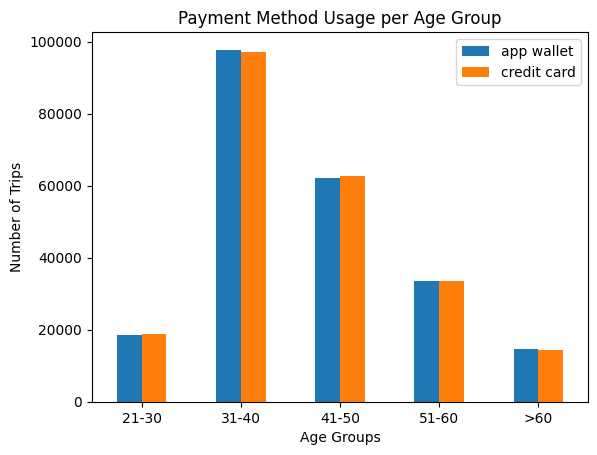

In [91]:
# select data for plotting
payment_chart_data = pivot_payment.select("age_group", "app wallet", "credit card")

# convert data to pandas dataframe
payment_chart_data_pandas = pivot_payment.toPandas()

# set x axis
payment_chart_data_pandas.set_index("age_group", inplace=True)

# plot bar graph
payment_chart_data_pandas.plot(kind="bar")

# set axis labels and title
plt.ylabel('Number of Trips')
plt.xlabel('Age Groups')
plt.title('Payment Method Usage per Age Group')
plt.xticks(rotation=360)

plt.show()

### ***Average usage duration distribution across the age groups***

In [92]:
# group data by age group and aggregate usage duration
age_group_duration = grouped_ages.groupBy('age_group').agg({'usage_duration':'mean'}).orderBy('age_group')
age_group_duration.show()

+---------+-------------------+
|age_group|avg(usage_duration)|
+---------+-------------------+
|    21-30| 12.045844745690909|
|    31-40| 11.071097644704954|
|    41-50| 10.738381783015535|
|    51-60| 11.275325550839725|
|      >60| 12.029317839377363|
+---------+-------------------+



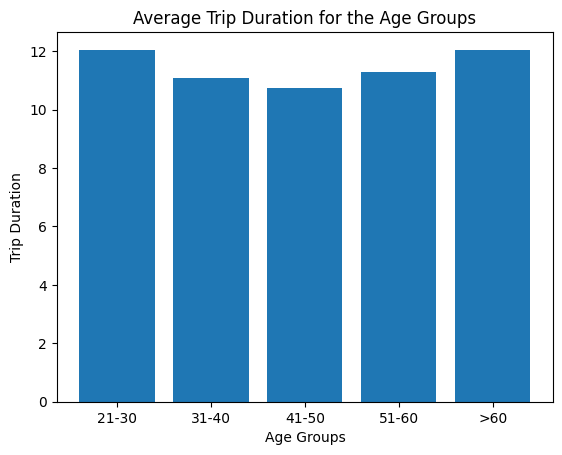

In [93]:
# convert plotting data to pandas
duration = age_group_duration.toPandas()

# plot bar chart
plt.bar(duration['age_group'], duration['avg(usage_duration)'])

# set axis labels and title
plt.xlabel('Age Groups')
plt.ylabel('Trip Duration')
plt.title('Average Trip Duration for the Age Groups')

plt.show()

### ***Average usage duration for the genders across the age groups***

In [94]:
# create pivot table for plotting
pivot_gender_duration = grouped_ages.groupBy('age_group').pivot('member_gender').agg({'usage_duration':'mean'}).orderBy('age_group')
pivot_gender_duration.show()

+---------+------------------+------------------+------------------+
|age_group|            Female|              Male|             Other|
+---------+------------------+------------------+------------------+
|    21-30| 14.47262978204188|11.305523398367091| 9.528843216337206|
|    31-40|12.534565392486883| 10.55360302644807|12.635689064770501|
|    41-50|12.003311516059751|10.395419727893154|12.895783128321264|
|    51-60|13.280050326680866|10.757442208892067|13.639758574348306|
|      >60|14.363384946669495|11.551676419155578|12.841317382401336|
+---------+------------------+------------------+------------------+



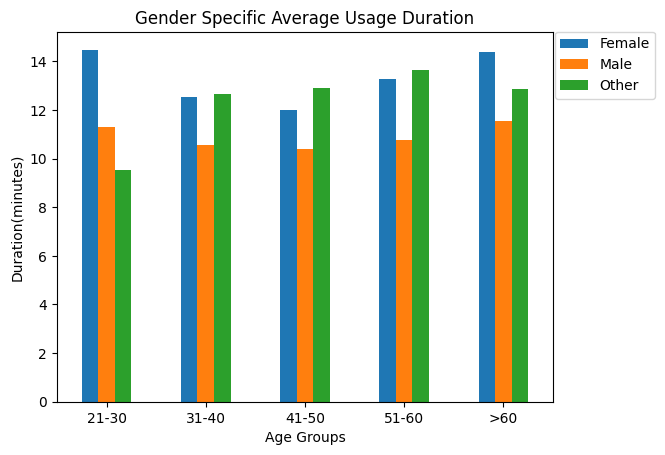

In [95]:
#convert plotting data to pandas
gender_duration_data = pivot_gender_duration.select("age_group", "Female", "Male", "Other").toPandas()

# set x axis
gender_duration_data.set_index("age_group", inplace=True)

# plot bar chart
gender_duration_data.plot(kind="bar")

# set axis labels and title
plt.ylabel('Duration(minutes)')
plt.xlabel('Age Groups')
plt.title('Gender Specific Average Usage Duration')
plt.xticks(rotation=360)

# set legend position
plt.legend(bbox_to_anchor=(1.22, 1.02), loc='upper right')

plt.show()

### ***Average gender distance across all age groups***

In [96]:
# create pivot table for plotting
pivot_gender_distance = grouped_ages.groupBy('age_group').pivot('member_gender').agg({'distance_km':'mean'}).orderBy('age_group')
pivot_gender_distance.show()

+---------+------------------+------------------+-----------------+
|age_group|            Female|              Male|            Other|
+---------+------------------+------------------+-----------------+
|    21-30|  5.06538715448478| 3.956936887888076|3.335144590251885|
|    31-40|  4.38710309836903|3.6937743779267445|4.422472008695693|
|    41-50| 4.201208566321568| 3.638411374586195|4.513535882381945|
|    51-60| 4.648055911442033|3.7651288828736718|4.773862579489817|
|      >60|5.0272301245122275| 4.043086183539686|4.494401194467516|
+---------+------------------+------------------+-----------------+



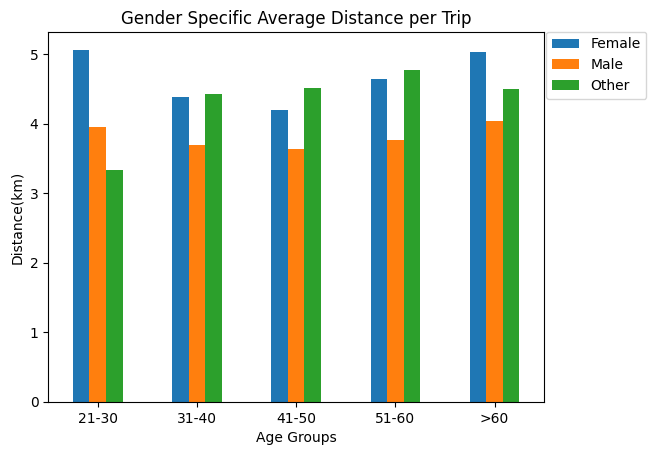

In [97]:
# convert plotting data to pandas
gender_distance_data = pivot_gender_distance.select("age_group", "Female", "Male", "Other").toPandas()

# set x axis
gender_distance_data.set_index("age_group", inplace=True)

# plot bar chart
gender_distance_data.plot(kind="bar")

# set axis labels and title
plt.ylabel('Distance(km)')
plt.xlabel('Age Groups')
plt.title('Gender Specific Average Distance per Trip')
plt.xticks(rotation=360)

# set legend position
plt.legend(bbox_to_anchor=(1.22, 1.02), loc='upper right')

plt.show()

### ***Average gender trip revenue for all age groups***

In [98]:
# create pivot table for pltting
pivot_gender_revenue = grouped_ages.groupBy('age_group').pivot('member_gender').agg({'trip_revenue':'mean'}).orderBy('age_group')
pivot_gender_revenue.show()

+---------+------------------+------------------+-----------------+
|age_group|            Female|              Male|            Other|
+---------+------------------+------------------+-----------------+
|    21-30|  5.06538715448478| 3.956936887888076|3.335144590251885|
|    31-40|  4.38710309836903|3.6937743779267445|4.422472008695693|
|    41-50| 4.201208566321568| 3.638411374586195|4.513535882381945|
|    51-60| 4.648055911442033|3.7651288828736718|4.773862579489817|
|      >60|5.0272301245122275| 4.043086183539686|4.494401194467516|
+---------+------------------+------------------+-----------------+



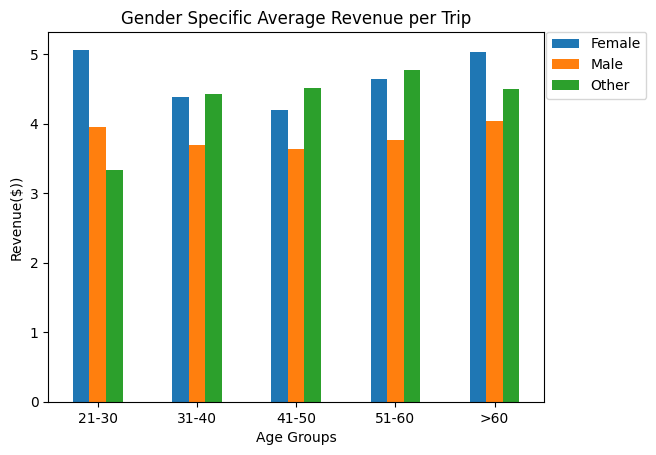

In [99]:
# convert plotting data to pandas
gender_revenue_data = pivot_gender_revenue.select("age_group", "Female", "Male", "Other").toPandas()

# set x axis
gender_revenue_data.set_index("age_group", inplace=True)

# plot bar chart
gender_distance_data.plot(kind="bar")

# set axis labels and title
plt.ylabel('Revenue($))')
plt.xlabel('Age Groups')
plt.title('Gender Specific Average Revenue per Trip')
plt.xticks(rotation=360)

# set legend position
plt.legend(bbox_to_anchor=(1.22, 1.02), loc='upper right')

plt.show()

### ***Combination of all metrics***

In [100]:
# group data by age group and user type and aggregate to create metrics
age_group_gender_duration = grouped_ages.groupBy('age_group', 'member_gender').agg({'usage_duration':'mean', 'distance_km':'mean', 'trip_revenue':'mean'}).orderBy('age_group', 'member_gender')
age_group_gender_duration.show()

+---------+-------------+------------------+------------------+-------------------+
|age_group|member_gender|  avg(distance_km)| avg(trip_revenue)|avg(usage_duration)|
+---------+-------------+------------------+------------------+-------------------+
|    21-30|       Female|  5.06538715448478|  5.06538715448478|  14.47262978204188|
|    21-30|         Male| 3.956936887888076| 3.956936887888076| 11.305523398367091|
|    21-30|        Other| 3.335144590251885| 3.335144590251885|  9.528843216337206|
|    31-40|       Female|  4.38710309836903|  4.38710309836903| 12.534565392486883|
|    31-40|         Male|3.6937743779267445|3.6937743779267445|  10.55360302644807|
|    31-40|        Other| 4.422472008695693| 4.422472008695693| 12.635689064770501|
|    41-50|       Female| 4.201208566321568| 4.201208566321568| 12.003311516059751|
|    41-50|         Male| 3.638411374586195| 3.638411374586195| 10.395419727893154|
|    41-50|        Other| 4.513535882381945| 4.513535882381945| 12.895783128

In [101]:
# plotting data pivot table
duration_gender_pivot = grouped_ages.groupBy('age_group').pivot('member_gender').agg({'usage_duration':'mean', 'distance_km':'mean', 'trip_revenue':'mean'}).orderBy('age_group')
duration_gender_pivot.show()

+---------+-----------------------+------------------------+--------------------------+---------------------+----------------------+------------------------+----------------------+-----------------------+-------------------------+
|age_group|Female_avg(distance_km)|Female_avg(trip_revenue)|Female_avg(usage_duration)|Male_avg(distance_km)|Male_avg(trip_revenue)|Male_avg(usage_duration)|Other_avg(distance_km)|Other_avg(trip_revenue)|Other_avg(usage_duration)|
+---------+-----------------------+------------------------+--------------------------+---------------------+----------------------+------------------------+----------------------+-----------------------+-------------------------+
|    21-30|       5.06538715448478|        5.06538715448478|         14.47262978204188|    3.956936887888076|     3.956936887888076|      11.305523398367091|     3.335144590251885|      3.335144590251885|        9.528843216337206|
|    31-40|       4.38710309836903|        4.38710309836903|        12.53456

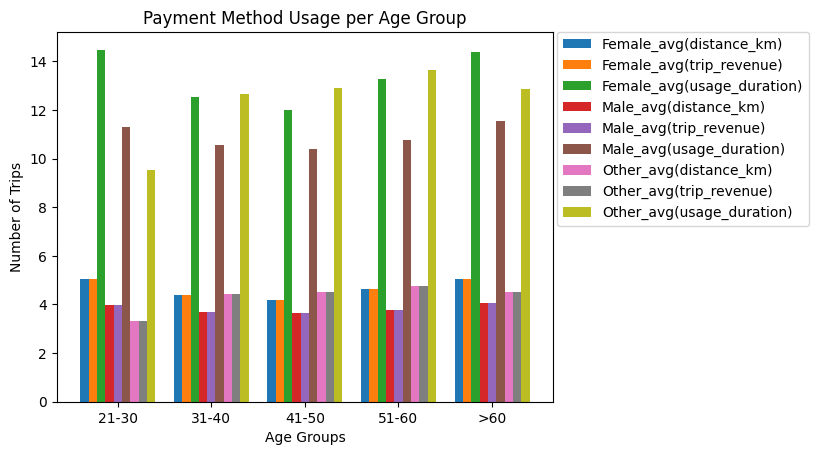

In [102]:
# convert plotting data to pandas
duration_gender_chart_data = duration_gender_pivot.toPandas()

# set x axis
duration_gender_chart_data.set_index("age_group", inplace=True)

# plot bar chart
duration_gender_chart_data.plot(kind="bar", width=0.8)

# set axis labels and title
plt.ylabel('Number of Trips')
plt.xlabel('Age Groups')
plt.title('Payment Method Usage per Age Group')
plt.xticks(rotation=360)

# set legend position
plt.legend(bbox_to_anchor=(1.53, 1.02), loc='upper right')

plt.show()

## **Correlation Analysis**

In [103]:
# define selected columns for correlation analysis and convert to pandas dataframe
df_corr = df.select('user_type', 'member_gender', 'Customer_Age', 'pyment', 'usage_duration', 'distance_km', 'trip_revenue').toPandas()

#convert categorical data to columns
for_corr = pd.get_dummies(df_corr, columns=['user_type', 'member_gender','pyment'])

for_corr


,Customer_Age,usage_duration,distance_km,trip_revenue,user_type_Customer,user_type_Subscriber,member_gender_Female,member_gender_Male,member_gender_Other,pyment_app wallet,pyment_credit card
0,36.0,15.180000,5.31,5.31,1,0,0,1,0,0,1
1,58.0,53.349998,18.67,18.67,1,0,1,0,0,0,1
2,NaN,42.799999,14.98,14.98,1,0,0,0,0,0,1
3,NaN,16.219999,5.68,5.68,1,0,0,0,0,0,1
4,26.0,6.720000,2.35,2.35,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
519695,32.0,7.270000,2.54,2.54,0,1,0,1,0,0,1
519696,50.0,7.200000,2.52,2.52,0,1,0,1,0,0,1
519697,38.0,7.080000,2.48,2.48,0,1,1,0,0,1,0
519698,42.0,6.100000,2.13,2.13,0,1,0,1,0,1,0


In [104]:
# calculate correlation matrix
corr_matrix = for_corr.corr()

corr_matrix

,Customer_Age,usage_duration,distance_km,trip_revenue,user_type_Customer,user_type_Subscriber,member_gender_Female,member_gender_Male,member_gender_Other,pyment_app wallet,pyment_credit card
Customer_Age,1.000000,0.000584,0.000586,0.000586,-0.105970,0.105970,-0.069878,0.066786,0.005656,0.001830,-0.001830
usage_duration,0.000584,1.000000,1.000000,1.000000,0.408406,-0.408406,0.024252,-0.260672,0.003083,0.000371,-0.000371
distance_km,0.000586,1.000000,1.000000,1.000000,0.408404,-0.408404,0.024253,-0.260673,0.003082,0.000372,-0.000372
trip_revenue,0.000586,1.000000,1.000000,1.000000,0.408404,-0.408404,0.024253,-0.260673,0.003082,0.000372,-0.000372
user_type_Customer,-0.105970,0.408406,0.408404,0.408404,1.000000,-1.000000,-0.074382,-0.409938,-0.018437,0.000509,-0.000509
user_type_Subscriber,0.105970,-0.408406,-0.408404,-0.408404,-1.000000,1.000000,0.074382,0.409938,0.018437,-0.000509,0.000509
member_gender_Female,-0.069878,0.024252,0.024253,0.024253,-0.074382,0.074382,1.000000,-0.689935,-0.053606,-0.001772,0.001772
member_gender_Male,0.066786,-0.260672,-0.260673,-0.260673,-0.409938,0.409938,-0.689935,1.000000,-0.157911,0.000480,-0.000480
member_gender_Other,0.005656,0.003083,0.003082,0.003082,-0.018437,0.018437,-0.053606,-0.157911,1.000000,0.000139,-0.000139
pyment_app wallet,0.001830,0.000371,0.000372,0.000372,0.000509,-0.000509,-0.001772,0.000480,0.000139,1.000000,-1.000000


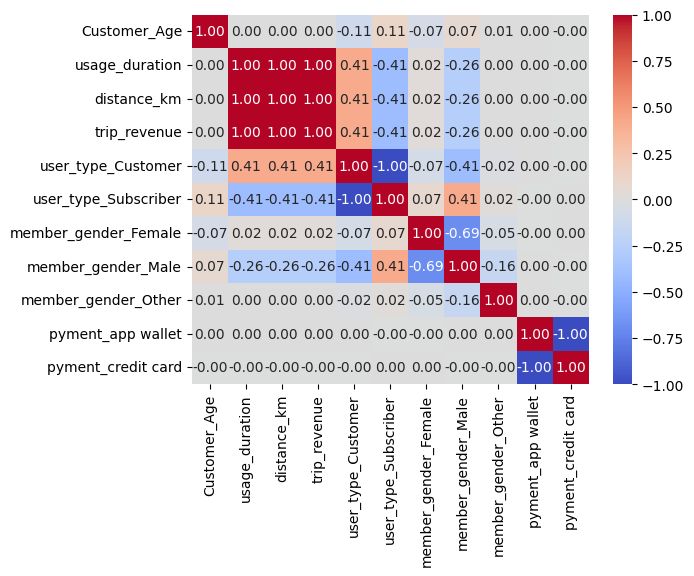

In [105]:
# Generate a mask for the upper triangular portion of the correlation matrix
#mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# create correlation heatmap with correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.show()

# **Using Folium Library to Generate Map of the Stations**

In [106]:
# install folum library
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
import folium
from folium.plugins import MarkerCluster

In [108]:
from pyspark.sql import functions as F
folium_data_start = data.groupby('start_station_name').agg(F.first('start_station_latitude').alias('start_station_latitude'), 
                                                      F.first('start_station_longitude').alias('start_station_longitude')
                                                     )

folium_data_end = data.groupby('end_station_name').agg(F.first('end_station_latitude').alias('end_station_latitude'), 
                                                      F.first('end_station_longitude').alias('end_station_longitude')
                                                     )

folium_data = folium_data_start.join(folium_data_end, folium_data_start.start_station_name == folium_data_end.end_station_name)
folium_data.count()

272

In [109]:
folium_data.show()

+--------------------+----------------------+-----------------------+--------------------+--------------------+---------------------+
|  start_station_name|start_station_latitude|start_station_longitude|    end_station_name|end_station_latitude|end_station_longitude|
+--------------------+----------------------+-----------------------+--------------------+--------------------+---------------------+
|19th St at Florid...|            37.7604469|            -122.410807|19th St at Florid...|          37.7604469|          -122.410807|
|5th St at Brannan St|            37.7767539|           -122.3990176|5th St at Brannan St|          37.7767539|         -122.3990176|
|College Ave at Ha...|             37.848152|           -122.2521599|College Ave at Ha...|           37.848152|         -122.2521599|
|Townsend St at 7t...|             37.771058|            -122.402717|Townsend St at 7t...|           37.771058|          -122.402717|
|Valencia St at Ce...|            37.7479981|           -122.4

In [110]:
folium_data1 = folium_data.toPandas()

In [111]:
latitude = folium_data1['start_station_latitude'][0]
longitude = folium_data1['start_station_longitude'][0]


# Create a map object
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Iterate over the rows of the DataFrame
for index, row in folium_data1.iterrows():
    # Extract the start station name, latitude, and longitude
    start_station_name = row['start_station_name']
    latitude = row['start_station_latitude']
    longitude = row['start_station_longitude']

      # Create a marker and add it to the map
    marker = folium.Marker(location=[latitude, longitude], tooltip=start_station_name)
    marker.add_to(map)

# Display the map
map